<ipython-input-1-c223695d8c14>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.Annual_Premium[train.Annual_Premium > xbar + 3 * xstd] = replace_value1
<ipython-input-1-c223695d8c14>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.Annual_Premium[train.Annual_Premium < xbar - 3 * xstd] = replace_value2


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,1.000000,-0.000428,-0.002241,-0.001237,-0.000383,0.002416,-0.004338,-0.002631,-0.003432,0.002419,-0.001927,-0.004497
Gender,-0.000428,1.000000,-0.146753,0.018885,-0.000259,0.081667,-0.161036,-0.091229,-0.003980,0.111875,0.004320,-0.052522
Age,-0.002241,-0.146753,1.000000,-0.079559,0.040517,-0.254141,0.765472,0.267351,0.069309,-0.577765,-0.001907,0.110201
Driving_License,-0.001237,0.018885,-0.079559,1.000000,-0.001100,0.015483,-0.037367,-0.016989,-0.012336,0.042744,-0.000573,0.010394
Region_Code,-0.000383,-0.000259,0.040517,-0.001100,1.000000,-0.023990,0.042732,0.026943,-0.011950,-0.042552,-0.002673,0.009228
Previously_Insured,0.002416,0.081667,-0.254141,0.015483,-0.023990,1.000000,-0.380830,-0.823759,0.006622,0.218775,0.003426,-0.340294
Vehicle_Age,-0.004338,-0.161036,0.765472,-0.037367,0.042732,-0.380830,1.000000,0.397131,0.041067,-0.550099,-0.001647,0.219852
Vehicle_Damage,-0.002631,-0.091229,0.267351,-0.016989,0.026943,-0.823759,0.397131,1.000000,0.008333,-0.223604,-0.003154,0.353612
Annual_Premium,-0.003432,-0.003980,0.069309,-0.012336,-0.011950,0.006622,0.041067,0.008333,1.000000,-0.116649,-0.001115,0.020917
Policy_Sales_Channel,0.002419,0.111875,-0.577765,0.042744,-0.042552,0.218775,-0.550099,-0.223604,-0.116649,1.000000,0.000152,-0.139047


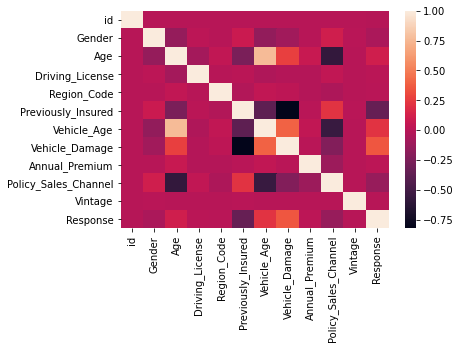

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import lightgbm as lgb
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import FastICA 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from catboost import CatBoostClassifier

train=pd.read_csv("train.csv")
train.isnull().any()
train[train.isnull().T.any()==True]
train.dropna(axis = 0, inplace=True)
train['Gender']=train.Gender.map({'Male':0,'Female':1})
train['Vehicle_Age']=train.Vehicle_Age.map({'< 1 Year':0,'1-2 Year':1,'> 2 Years':2})
train['Vehicle_Damage']=train.Vehicle_Damage.map({'No':0,'Yes':1})
train['isFemale']=''
train['isMale']=''
train['isFemale']==train.Gender.map({'Male':0,'Female':1})
train['isMale']==train.Gender.map({'Male':1,'Female':0})
train.drop(['Gender'],axis=1)

test=pd.read_csv("test.csv")
test.isnull().any()
#test[test.isnull().T.any()==True]
#test.dropna(axis = 0, inplace=True)
test['Gender']=test.Gender.map({'Male':0,'Female':1})
test['Vehicle_Age']=test.Vehicle_Age.map({'< 1 Year':0,'1-2 Year':1,'> 2 Years':2})
test['Vehicle_Damage']=test.Vehicle_Damage.map({'No':0,'Yes':1})
test['isFemale']=''
test['isMale']=''
test['isFemale']==test.Gender.map({'Male':0,'Female':1})
test['isMale']==test.Gender.map({'Male':1,'Female':0})
test.drop(['Gender'],axis=1)

xbar = train.Annual_Premium.mean()
xstd = train.Annual_Premium.std()
replace_value1 = train.Annual_Premium[train.Annual_Premium < xbar + 3 * xstd].max()
replace_value2 = train.Annual_Premium[train.Annual_Premium > xbar - 3 * xstd].min()
train.Annual_Premium[train.Annual_Premium > xbar + 3 * xstd] = replace_value1
train.Annual_Premium[train.Annual_Premium < xbar - 3 * xstd] = replace_value2

corr=train.corr()
corr=(corr)
sb.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
corr


In [2]:
#x=train.loc[:,'Age':'Vintage']
x=StandardScaler().fit_transform(train.loc[:,'Age':'Vintage'])
print(x[1:10,3:4])
y=train.loc[:,'Response']
print(y)
#x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)
x_train, y_train=x,y

[[-0.91950543]
 [-0.91950543]
 [ 1.08754115]
 [-0.91950543]
 [ 1.08754115]
 [ 1.08754115]
 [-0.91950543]
 [ 1.08754115]
 [-0.91950543]]
0         0
1         1
2         1
3         0
4         1
         ..
304883    0
304884    0
304885    0
304886    0
304887    0
Name: Response, Length: 303131, dtype: int64


In [3]:
#CLF=MLPClassifier(hidden_layer_sizes=(1000), max_iter=100)
#CLF1=XGBClassifier(silent=0,learning_rate=0.1,max_depth=7,gamma = 0,n_estimators=1000)
#CLF2=lgb.LGBMClassifier(max_depth=5,num_leaves=35,n_estimators=150,learning_rate=0.09)
#CLF3=RandomForestClassifier(n_estimators=1000)
CLF4=CatBoostClassifier(depth=4,
                        early_stopping_rounds=1000,
                        iterations=1200,
                        l2_leaf_reg=9,
                        learning_rate=0.05,
                        loss_function='MultiClass'
                        )
#ECLF = VotingClassifier(estimators=[('catboost',CLF4),('lgbm',CLF2),('rfc',CLF3)], voting='soft',weights=[3,2,1])

'''
param_test = {
    'max_depth': range(4,10,1),
    'learning_rate':np.arange(0.01,0.1,0.01),
    'n_estimators':range(500,1500,200)
}
param_test = {'depth': [4, 6, 10],
          'learning_rate' : [0.05, 0.1, 0.15],
          'l2_leaf_reg': [1,4,9],
          'iterations': [1200],
           'early_stopping_rounds':[1000],
           'task_type':['GPU'],
           'loss_function':['MultiClass'],
          
         }
gsearch = GridSearchCV( ECLF , param_grid = param_test, scoring='roc_auc', cv=5 )
gsearch.fit( x_train, y_train )
gsearch.best_params_
'''


CLF4.fit(x_train,y_train)

0:	learn: 0.6621452	total: 167ms	remaining: 3m 19s
1:	learn: 0.6341400	total: 195ms	remaining: 1m 56s
2:	learn: 0.6085182	total: 222ms	remaining: 1m 28s
3:	learn: 0.5852478	total: 248ms	remaining: 1m 14s
4:	learn: 0.5638352	total: 276ms	remaining: 1m 6s
5:	learn: 0.5442429	total: 304ms	remaining: 1m
6:	learn: 0.5262595	total: 329ms	remaining: 56.1s
7:	learn: 0.5094782	total: 356ms	remaining: 53.1s
8:	learn: 0.4941715	total: 385ms	remaining: 51s
9:	learn: 0.4802307	total: 414ms	remaining: 49.3s
10:	learn: 0.4673628	total: 442ms	remaining: 47.8s
11:	learn: 0.4551019	total: 472ms	remaining: 46.7s
12:	learn: 0.4438877	total: 498ms	remaining: 45.5s
13:	learn: 0.4334557	total: 526ms	remaining: 44.6s
14:	learn: 0.4235613	total: 554ms	remaining: 43.8s
15:	learn: 0.4142916	total: 583ms	remaining: 43.2s
16:	learn: 0.4057383	total: 611ms	remaining: 42.5s
17:	learn: 0.3978208	total: 640ms	remaining: 42s
18:	learn: 0.3904159	total: 673ms	remaining: 41.9s
19:	learn: 0.3833391	total: 703ms	remaining:

162:	learn: 0.2670324	total: 4.65s	remaining: 29.6s
163:	learn: 0.2670169	total: 4.68s	remaining: 29.6s
164:	learn: 0.2669925	total: 4.7s	remaining: 29.5s
165:	learn: 0.2669647	total: 4.73s	remaining: 29.5s
166:	learn: 0.2669495	total: 4.76s	remaining: 29.4s
167:	learn: 0.2669093	total: 4.79s	remaining: 29.4s
168:	learn: 0.2669038	total: 4.81s	remaining: 29.3s
169:	learn: 0.2668491	total: 4.84s	remaining: 29.3s
170:	learn: 0.2668227	total: 4.86s	remaining: 29.3s
171:	learn: 0.2667954	total: 4.89s	remaining: 29.2s
172:	learn: 0.2667812	total: 4.92s	remaining: 29.2s
173:	learn: 0.2667612	total: 4.94s	remaining: 29.1s
174:	learn: 0.2667486	total: 4.97s	remaining: 29.1s
175:	learn: 0.2667315	total: 4.99s	remaining: 29s
176:	learn: 0.2667165	total: 5.02s	remaining: 29s
177:	learn: 0.2666955	total: 5.04s	remaining: 29s
178:	learn: 0.2666784	total: 5.07s	remaining: 28.9s
179:	learn: 0.2666703	total: 5.09s	remaining: 28.9s
180:	learn: 0.2666503	total: 5.12s	remaining: 28.8s
181:	learn: 0.26663

327:	learn: 0.2649935	total: 9.02s	remaining: 24s
328:	learn: 0.2649908	total: 9.04s	remaining: 23.9s
329:	learn: 0.2649845	total: 9.06s	remaining: 23.9s
330:	learn: 0.2649785	total: 9.09s	remaining: 23.9s
331:	learn: 0.2649731	total: 9.12s	remaining: 23.8s
332:	learn: 0.2649689	total: 9.14s	remaining: 23.8s
333:	learn: 0.2649612	total: 9.17s	remaining: 23.8s
334:	learn: 0.2649559	total: 9.19s	remaining: 23.7s
335:	learn: 0.2649398	total: 9.22s	remaining: 23.7s
336:	learn: 0.2649313	total: 9.25s	remaining: 23.7s
337:	learn: 0.2649231	total: 9.28s	remaining: 23.7s
338:	learn: 0.2649191	total: 9.3s	remaining: 23.6s
339:	learn: 0.2649162	total: 9.32s	remaining: 23.6s
340:	learn: 0.2649037	total: 9.35s	remaining: 23.6s
341:	learn: 0.2648986	total: 9.38s	remaining: 23.5s
342:	learn: 0.2648765	total: 9.4s	remaining: 23.5s
343:	learn: 0.2648741	total: 9.43s	remaining: 23.5s
344:	learn: 0.2648713	total: 9.45s	remaining: 23.4s
345:	learn: 0.2648514	total: 9.48s	remaining: 23.4s
346:	learn: 0.26

487:	learn: 0.2642196	total: 13.3s	remaining: 19.4s
488:	learn: 0.2642129	total: 13.3s	remaining: 19.3s
489:	learn: 0.2642088	total: 13.3s	remaining: 19.3s
490:	learn: 0.2642056	total: 13.4s	remaining: 19.3s
491:	learn: 0.2642017	total: 13.4s	remaining: 19.3s
492:	learn: 0.2641986	total: 13.4s	remaining: 19.2s
493:	learn: 0.2641976	total: 13.4s	remaining: 19.2s
494:	learn: 0.2641942	total: 13.5s	remaining: 19.2s
495:	learn: 0.2641905	total: 13.5s	remaining: 19.1s
496:	learn: 0.2641890	total: 13.5s	remaining: 19.1s
497:	learn: 0.2641871	total: 13.5s	remaining: 19.1s
498:	learn: 0.2641819	total: 13.6s	remaining: 19.1s
499:	learn: 0.2641744	total: 13.6s	remaining: 19s
500:	learn: 0.2641720	total: 13.6s	remaining: 19s
501:	learn: 0.2641595	total: 13.7s	remaining: 19s
502:	learn: 0.2641571	total: 13.7s	remaining: 19s
503:	learn: 0.2641553	total: 13.7s	remaining: 18.9s
504:	learn: 0.2641525	total: 13.7s	remaining: 18.9s
505:	learn: 0.2641501	total: 13.8s	remaining: 18.9s
506:	learn: 0.264144

647:	learn: 0.2636998	total: 17.6s	remaining: 15s
648:	learn: 0.2636973	total: 17.6s	remaining: 15s
649:	learn: 0.2636948	total: 17.7s	remaining: 15s
650:	learn: 0.2636938	total: 17.7s	remaining: 14.9s
651:	learn: 0.2636919	total: 17.7s	remaining: 14.9s
652:	learn: 0.2636890	total: 17.7s	remaining: 14.9s
653:	learn: 0.2636864	total: 17.8s	remaining: 14.8s
654:	learn: 0.2636855	total: 17.8s	remaining: 14.8s
655:	learn: 0.2636819	total: 17.8s	remaining: 14.8s
656:	learn: 0.2636775	total: 17.9s	remaining: 14.8s
657:	learn: 0.2636744	total: 17.9s	remaining: 14.7s
658:	learn: 0.2636727	total: 17.9s	remaining: 14.7s
659:	learn: 0.2636684	total: 17.9s	remaining: 14.7s
660:	learn: 0.2636641	total: 17.9s	remaining: 14.6s
661:	learn: 0.2636605	total: 18s	remaining: 14.6s
662:	learn: 0.2636589	total: 18s	remaining: 14.6s
663:	learn: 0.2636571	total: 18s	remaining: 14.6s
664:	learn: 0.2636547	total: 18.1s	remaining: 14.5s
665:	learn: 0.2636513	total: 18.1s	remaining: 14.5s
666:	learn: 0.2636484	to

808:	learn: 0.2632798	total: 22s	remaining: 10.6s
809:	learn: 0.2632771	total: 22s	remaining: 10.6s
810:	learn: 0.2632757	total: 22s	remaining: 10.6s
811:	learn: 0.2632733	total: 22.1s	remaining: 10.5s
812:	learn: 0.2632705	total: 22.1s	remaining: 10.5s
813:	learn: 0.2632671	total: 22.1s	remaining: 10.5s
814:	learn: 0.2632652	total: 22.1s	remaining: 10.5s
815:	learn: 0.2632641	total: 22.2s	remaining: 10.4s
816:	learn: 0.2632621	total: 22.2s	remaining: 10.4s
817:	learn: 0.2632604	total: 22.2s	remaining: 10.4s
818:	learn: 0.2632587	total: 22.2s	remaining: 10.3s
819:	learn: 0.2632577	total: 22.3s	remaining: 10.3s
820:	learn: 0.2632529	total: 22.3s	remaining: 10.3s
821:	learn: 0.2632513	total: 22.3s	remaining: 10.3s
822:	learn: 0.2632498	total: 22.3s	remaining: 10.2s
823:	learn: 0.2632485	total: 22.4s	remaining: 10.2s
824:	learn: 0.2632474	total: 22.4s	remaining: 10.2s
825:	learn: 0.2632456	total: 22.4s	remaining: 10.2s
826:	learn: 0.2632435	total: 22.4s	remaining: 10.1s
827:	learn: 0.2632

967:	learn: 0.2629681	total: 26.3s	remaining: 6.31s
968:	learn: 0.2629670	total: 26.4s	remaining: 6.28s
969:	learn: 0.2629664	total: 26.4s	remaining: 6.25s
970:	learn: 0.2629631	total: 26.4s	remaining: 6.23s
971:	learn: 0.2629603	total: 26.4s	remaining: 6.2s
972:	learn: 0.2629595	total: 26.5s	remaining: 6.17s
973:	learn: 0.2629576	total: 26.5s	remaining: 6.14s
974:	learn: 0.2629554	total: 26.5s	remaining: 6.12s
975:	learn: 0.2629541	total: 26.5s	remaining: 6.09s
976:	learn: 0.2629533	total: 26.6s	remaining: 6.06s
977:	learn: 0.2629509	total: 26.6s	remaining: 6.03s
978:	learn: 0.2629500	total: 26.6s	remaining: 6s
979:	learn: 0.2629485	total: 26.6s	remaining: 5.98s
980:	learn: 0.2629479	total: 26.6s	remaining: 5.95s
981:	learn: 0.2629468	total: 26.7s	remaining: 5.92s
982:	learn: 0.2629444	total: 26.7s	remaining: 5.89s
983:	learn: 0.2629426	total: 26.7s	remaining: 5.87s
984:	learn: 0.2629397	total: 26.8s	remaining: 5.84s
985:	learn: 0.2629382	total: 26.8s	remaining: 5.81s
986:	learn: 0.26

1130:	learn: 0.2627044	total: 30.6s	remaining: 1.86s
1131:	learn: 0.2627024	total: 30.6s	remaining: 1.84s
1132:	learn: 0.2627015	total: 30.6s	remaining: 1.81s
1133:	learn: 0.2627001	total: 30.6s	remaining: 1.78s
1134:	learn: 0.2626983	total: 30.7s	remaining: 1.76s
1135:	learn: 0.2626980	total: 30.7s	remaining: 1.73s
1136:	learn: 0.2626960	total: 30.7s	remaining: 1.7s
1137:	learn: 0.2626951	total: 30.8s	remaining: 1.68s
1138:	learn: 0.2626945	total: 30.8s	remaining: 1.65s
1139:	learn: 0.2626936	total: 30.8s	remaining: 1.62s
1140:	learn: 0.2626923	total: 30.9s	remaining: 1.59s
1141:	learn: 0.2626897	total: 30.9s	remaining: 1.57s
1142:	learn: 0.2626888	total: 30.9s	remaining: 1.54s
1143:	learn: 0.2626865	total: 31s	remaining: 1.51s
1144:	learn: 0.2626849	total: 31s	remaining: 1.49s
1145:	learn: 0.2626840	total: 31s	remaining: 1.46s
1146:	learn: 0.2626828	total: 31s	remaining: 1.43s
1147:	learn: 0.2626817	total: 31.1s	remaining: 1.41s
1148:	learn: 0.2626807	total: 31.1s	remaining: 1.38s
11

In [4]:
#KNN填充测试集中的缺失值
test_imputer=KNNImputer(n_neighbors=2)
a=test_imputer.fit_transform(test[['Driving_License']])
b=test_imputer.fit_transform(test[['Policy_Sales_Channel']])
test['Driving_License']=a
test['Policy_Sales_Channel']=b
test.isnull().any()

id                      False
Gender                  False
Age                     False
Driving_License         False
Region_Code             False
Previously_Insured      False
Vehicle_Age             False
Vehicle_Damage          False
Annual_Premium          False
Policy_Sales_Channel    False
Vintage                 False
isFemale                False
isMale                  False
dtype: bool

In [5]:
x_test=StandardScaler().fit_transform(test.loc[:,'Age':'Vintage'])#进行标准化
#y_test=test.loc[:,'Response']
np.set_printoptions(threshold=np.inf)

In [6]:
a=CLF4.predict_proba(x_test)
scores=a[:,1:2]
'''
fpr,tpr,threshold = roc_curve(y_test, scores)
roc_auc = auc(fpr,tpr)
plt.figure() 
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
print(roc_auc)
'''

'\nfpr,tpr,threshold = roc_curve(y_test, scores)\nroc_auc = auc(fpr,tpr)\nplt.figure() \nlw = 2\nplt.figure(figsize=(10,10))\nplt.plot(fpr, tpr, color=\'darkorange\',\n         lw=lw, label=\'ROC curve (area = %0.2f)\' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线\nplt.plot([0, 1], [0, 1], color=\'navy\', lw=lw, linestyle=\'--\')\nplt.xlim([0.0, 1.0])\nplt.ylim([0.0, 1.05])\nplt.xlabel(\'False Positive Rate\')\nplt.ylabel(\'True Positive Rate\')\nplt.title(\'Receiver operating characteristic example\')\nplt.legend(loc="lower right")\nplt.show()\nprint(roc_auc)\n'

In [7]:
df = pd.DataFrame(scores, columns=['Response'])
print(df)
df.to_csv("results.csv", index_label="id")

       Response
0      0.312127
1      0.000625
2      0.375906
3      0.001683
4      0.200579
...         ...
76216  0.460732
76217  0.015021
76218  0.000509
76219  0.117896
76220  0.146184

[76221 rows x 1 columns]


In [5]:
pip list

Package                            Version
---------------------------------- -----------------
absl-py                            0.10.0
alabaster                          0.7.12Note: you may need to restart the kernel to use updated packages.



You should consider upgrading via the 'C:\Users\Picasphere\anaconda3\python.exe -m pip install --upgrade pip' command.


anaconda-client                    1.7.2
anaconda-navigator                 1.9.12
anaconda-project                   0.8.3
argh                               0.26.2
asn1crypto                         1.3.0
astroid                            2.4.2
astropy                            4.0.1.post1
astunparse                         1.6.3
atomicwrites                       1.4.0
attrs                              19.3.0
autopep8                           1.5.3
Babel                              2.8.0
backcall                           0.2.0
backports.functools-lru-cache      1.6.1
backports.shutil-get-terminal-size 1.0.0
backports.tempfile                 1.0
backports.weakref                  1.0.post1
bcrypt                             3.1.7
beautifulsoup4                     4.9.1
bitarray                           1.4.0
bkcharts                           0.2
bleach                             3.1.5
bokeh                              2.1.1
boto                               2.49.0
Bottle